# 1. Introduction

- In the world of music, few artists have experienced as transformative a journey as Justin Bieber. From his early days as a teenage heartthrob to his current status as a global pop icon, Bieber’s music has evolved in tandem with his personal life. This evolution is particularly evident when comparing two of his most significant albums: Purpose (2015) and Justice (2021). These albums not only showcase his growth as an artist but also reflect his internal struggles and the maturity he gained over the years.

--


### 1.1. The Significance of Purpose Album
- Released in 2015, Purpose marked a turning point in Justin Bieber’s career, both musically and personally. After a tumultuous period marked by public scrutiny and personal challenges, Bieber used Purpose as a vehicle to reclaim his narrative. The album is deeply introspective, exploring themes of redemption, forgiveness, and self-discovery. According to Bieber, the title Purpose was chosen because he felt like he had lost his purpose in life and was on a journey to rediscover it. The album’s tracks, including hits like “Sorry” and “Love Yourself,” were not just commercial successes but also deeply personal reflections on his life at that time. This period also saw Bieber collaborating with a range of producers, including Skrillex and Diplo, to create a sound that blended EDM with pop and R&B, further symbolizing his rebirth as an artist ￼ 

--


### 1.2. The Evolution to Justice Album
- Fast forward to 2021, and Justin Bieber released Justice, an album that reflects a different stage of his life. While Purpose was about finding personal redemption, Justice takes on a broader, more societal focus. The album was inspired by Bieber’s desire to address the injustices he saw in the world, a theme that is particularly poignant given the global events leading up to its release. Bieber’s own name, which means “justice,” influenced the album’s title, underscoring his personal connection to the concept. The album also includes deeply personal tracks dedicated to his wife, Hailey Baldwin, showcasing a more settled and mature side of the artist. Justice is a testament to Bieber’s growth, not just as a musician but as a person who has found peace and a sense of purpose beyond himself.

--


### 1.3. Conclusion
- Together, Purpose and Justice tell the story of Justin Bieber’s journey from a young man searching for meaning to an artist who has found his place in the world. These albums are more than just collections of songs; they are reflective of Bieber’s internal battles, his public image, and his desire to contribute something positive to the world. As we delve into the lyrics and themes of these two albums, we will uncover the layers of growth and change that define Justin Bieber’s career.

--

---

# 2. Data Preparation

### 2.1. Import Libraries

In [41]:
import json
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer




pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)

--

### 2.2. Import Scrapped Lyrics

In [2]:
data = pd.read_csv('justin_bieber_lyrics_albums_cleaned.csv')
data.head(10)

,title,artist,album,lyrics
0,Mark My Words,Justin Bieber,Purpose,"Mark my words, that's all that I have\nMark my words, give you all I got\nIn every way I will\nYou're the only reason why\nOh, I don't wanna live a lie\nMark my words\nMark my words\n\n\nSo you heard it all before\nFalling in and out of trust\nTrying to rekindle us\nOnly to lose yourself\nBut I won't let me lose you\nAnd I won't let us just fade away\nAfter all that we've been through\nI'ma show you more than I ever could say\n\n\nMark my words, that's all that I have\nMark my words, give you all I got\nIn every way I will\nYou're the only reason why\nOh, I don't wanna live a lie\nMark my words\nMark my wordsYou might also like"
1,I’ll Show You,Justin Bieber,Purpose,"My life is a movie\nAnd everyone's watching\nSo let's get to the good part\nAnd past all the nonsense\n\n\nSometimes it's hard to do the right thing\nWhen the pressure's coming down like lightning\nIt's like they want me to be perfect\nWhen they don't even know that I'm hurting\n\n\n'Cause life's not easy, I'm not made out of steel\nDon't forget that I'm human, don't forget that I'm real\nAct like you know me, but you never will\nBut there's one thing that I know for sure\n\n\nI'll show you\nI'll show you\nI'll show you\nI'll show you\n\n\nI've got to learn things\nLearn them the hard way\nGot to see what it feels like\nNo matter what they say\nYou might also like\nSometimes it's hard to do the right thing\nWhen the pressure's coming down like lightning\nIt's like they want me to be perfect\nWhen they don't even know that I'm hurting\n\n\n'Cause life's not easy, I'm not made out of steel\nDon't forget that I'm human, don't forget that I'm real\nAct like you know me, but you never will\nBut there's one thing that I know for sure\n\n\nI'll show you\nI'll show you\nI'll show you\nI'll show you\n\n\n'Cause life's not easy, I'm not made out of steel\nDon't forget that I'm human, don't forget that I'm real\nAct like you know me, but you never will\nThere's one thing that I know for sure\n\n\nI'll show you\nI'll show you, woah"
2,What Do You Mean?,Justin Bieber,Purpose,"What do you mean? Oh, oh\nWhen you nod your head yes, but you wanna say no\nWhat do you mean? Hey, yeah\nWhen you don't want me to move, but you tell me to go\nWhat do you mean? Oh, what do you mean?\nSaid you're runnin' outta time, what do you mean?\nOh, oh, oh, what do you mean?\nBetter make up your mind, what do you mean?\n\n\nYou're so indecisive of what I'm sayin'\nTryna catch the beat, make up your heart\nDon't know if you're happy or complainin'\nDon't want for us to end, where do I start?\n\n\nFirst you wanna go to the left, then you wanna turn right (Right)\nWanna argue all day, makin' love all night (All night)\nFirst you're up, then you’re down, and then between ('Tween)\nOh, I really wanna know\n\n\nWhat do you mean? Oh, oh\nWhen you nod your head yes, but you wanna say no\nWhat do you mean? Hey, yeah\nWhen you don't want me to move, but you tell me to go\nWhat do you mean? Oh, what do you mean?\nSaid you're runnin' outta time, what do you mean?\nOh, oh, oh, what do you mean? Better make up your mind\nWhat do you mean?\nYou might also like\nYou're overprotective when I'm leavin'\nTryna compromise, but I can’t win\nYou wanna make a point, but you keep preachin'\nYou had me from the start, won't let this end\n\n\nFirst you wanna go to the left, then you wanna turn right\n(Turn right)\nWanna argue all day, makin' love all night (All night)\nFirst you're up, then you’re down, and then between ('Tween)\nOh, I really wanna know\n\n\nWhat do you mean? Oh, oh (Yeah, yeah, yeah, yeah)\nWhen you nod your head yes, but you wanna say no\nWhat do you mean? (Oh, what do you mean?) Hey, yeah\nWhen you don't want me to move, but you tell me to go\nWhat do you mean? (I wanna know, ooh)\nOh, what do you mean? (Ooh)\nSaid you're runnin' outta time, what do you mean? (Oh, baby)\nOh, oh, oh, what do you mean? Better make up your mind\nWhat do you me

--

### 2.3. Data Cleaning

2.3.1. Import Contractions Words List

In [3]:
# Load the contraction mappings from the JSON file
with open('contractions.json', 'r') as file:
    contraction_mapping = json.load(file)

--

2.3.2. Apply Lemmatizer, Stopwords, and Remove Words

In [4]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Custom stopwords list
custom_stopwords = set(stopwords.words('english')) - {'you', 'i', 'we', 'me', 'my', 'do', 'not', 'doing', 'does', 'did'}

# Words to be removed entirely
words_to_remove = {'mmm', 'yes', 'yeah', 'ooh-ooh-ooh ooh', 'ho-ho-ho-holy', 'uh-uh', 'gon', 'mmm', 'yes', 'yeah', 'ooh', 'oh', 'ho-ho-ho-holy', 'uh-uh', 'gon', 'way', 'ooh ooh', 'ooh-ooh', 'oooooooooooh', 'ooh', 'oh', 'yeah'}

--

2.3.3. Replace Words Manually

In [5]:
replacement_patterns = {
    r"\bmight\b": "may",
    r"\bprayed\b": "pray",
    r"\bactin\b": "act",
    r"\bbelieving\b": "believe",
    r"\bbelieved\b": "believe",
    r"\brunnin\b": "run",
    r"\bcrushin\b": "crush",
    r"\bgoin\b": "go",
    r"\bleaving\b": "leave",
    r"\bleavin\b": "leave",
    r"\bleft\b": "leave",
    r"\babandoned\b": "abandon",
    r"\btried\b": "try",
    r"\bjudged\b": "judge",
    r"\blistening\b": "listen",
    r"\blistenin\b": "listen",
    r"\blistened\b": "listen",
    r"\badored\b": "adore",
    r"\bloved\b": "love",
    r"\bloving\b": "love",
    r"\blovin\b": "love",
    r"\bbreathin\b": "breath",
    r"\bbreathing\b": "breath",
    r"\bearlier\b": "early",
    r"\bdied\b": "die",
    r"\bpulled\b": "pull",
    r"\bcrossing\b": "cross",
    r"\bcrossin\b": "cross",
    r"\bcheckin\b": "check",
    r"\bchecking\b": "check",
    r"\bg-g-g-g-get\b": "get",
    r"\bburnin\b": "burn",
    r"\bburning\b": "burn",
    r"\bburned\b": "burn",
    r"\bpainting\b": "paint",
    r"\bpaintin\b": "paint",
    r"\bwould\b": "will",
    r"\b'til\b": "until",
    r"\blookin\b": "look",
    r"\blooking\b": "look",
    r"\bcrossed\b": "cross",
    r"\bbein\b": "be",
    r"\bbeing\b": "be",
    r"\bnothin\b": "nothing",
    r"\bundercovers\b": "cover",
    r"\bundercover\b": "cover",
    r"\bwalked\b": "walk",
    r"\bwalking\b": "walk",
    r"\bwalkin\b": "walk",
    r"\bopened\b": "open",
    r"\bmornin\b": "morning",
    r"\bsomethin\b": "something",
    r"\bfelt\b": "feel",
    r"\bwatching\b": "watch",
    r"\bwaking\b": "wake",
    r"\bwanna\b": "want to",
    r"\bain't\b": "ain't",
    r"\bcomplainin\b": "complain",
    r"\bcomplaining\b": "complain",
    r"\bu\b": "you",
    r"\boutta\b": "out of",
    r"\byoure\b": "you are",
    r"\btryna\b": "try",
    r"\bpreachin\b": "preach",
    r"\bmakin\b": "make",
    r"\bmaking\b": "make",
    r"\bconfusin\b": "confuse",
    r"\bconfusing\b": "confuse",
    r"\bgotta\b": "have to",
    r"\bmovin\b": "move",
    r"\bholdin\b": "hold",
    r"\bholding\b": "hold",
    r"\bdoin\b": "do",
    r"\bdoing\b": "do",
    r"\bsaying\b": "say",
    r"\btalking\b": "talk",
    r"\bheard\b": "hear",
    r"\blivin\b": "live",
    r"\bliving\b": "live",
    r"\bcould\b": "can",
    r"\blearned\b": "learn",
    r"\bfighting\b": "fight",
    r"\bmine\b": "my",
    r"\bwaiting\b": "wait",
    r"\bsleeping\b": "sleep",
    r"\bhated\b": "hate",
    r"\bthinking\b": "think",
    r"\bfalling\b": "fall",
    r"\bcoming\b": "come",
    r"\bcryin\b": "cry",
    r"\b'tween\b": "between",
    r"\bfeeling\b": "feel",
    r"\bthought\b": "think",
    r"\bpraying\b": "pray",
    r"\bsinking\b": "sink",
    r"\brealizing\b": "realize",
    r"\blosin\b": "lose",
    r"\blosing\b": "lose",
    r"\bplayin\b": "play",
    r"\bplaying\b": "play",
    r"\bplayed\b": "play",
    r"\b'less\b": "unless",
    r"\bgone\b": "go",
    r"\bbeginning\b": "begin",
    r"\bsupposed\b": "suppose",
    r"\bmissing\b": "miss",
    r"\bpulling\b": "pull",
    r"\btrying\b": "try",
    r"\bdeceiving\b": "deceive",
    r"\bdeceived\b": "deceive",
    r"\bgave\b": "give",
    r"\bdoe\b": "do",
    r"\bcomin\b": "come",
    r"\bskating\b": "skate",
    r"\btearing\b": "tear",
    r"\bcheatin\b": "cheat",
    r"\bcheating\b": "cheat",
    r"\bhappening\b": "happen",
    r"\bgiving\b": "give",
    r"\bunderstanding\b": "understand",
    r"\bdancin\b": "dance",
    r"\bdancing\b": "dance",
    r"\blayin\b": "lay",
    r"\basleep\b": "sleep",
    r"\bblessin\b": "bless",
    r"\bhigher\b": "high",
    r"\bblurred\b": "blur",
    r"\bthinkin\b": "think",
    r"\bruined\b": "ruin",
    r"\bhardest\b": "hard",
    r"\bshowed\b": "show",
    r"\bbleeds\b": "bleed",
    r"\bgon\b": "go",
    r"\bbroken\b": "broke",
    r"\bcriticized\b": "criticize",
    r"\bloses\b": "lose",
    r"\bneeded\b": "need",
    r"\bspinnin\b": "spin",
    r"\bstole\b": "steal",
    r"\bborrowed\b": "borrow",
    r"\byou're\b": "you",
    r"\bbought\b": "buy",
    r"\bdatin\b": "date",
    r"\bstarted\b": "start",
    r"\btextin\b": "text",
    r"\b'bout\b": "about",
    r"\bkillin\b": "kill",
    r"\bloooonely\b": "lonely"
}

--

2.3.4. Create Functions

In [6]:
# Function to expand contractions
def expand_contractions(text, contraction_mapping):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), flags=re.IGNORECASE|re.DOTALL)
    
    def replace(match):
        match = match.group(0)
        expanded_contraction = contraction_mapping.get(match.lower())
        return expanded_contraction
    
    expanded_text = contractions_pattern.sub(replace, text)
    return expanded_text

In [7]:
# Function to apply custom replacements
def apply_replacements(text, replacement_patterns):
    for pattern, replacement in replacement_patterns.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)
    return text

In [8]:
# Function to clean the lyrics
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Expand contractions
    text = expand_contractions(text, contraction_mapping)
    
    # Apply custom replacements
    text = apply_replacements(text, replacement_patterns)
    
    # Remove specific words
    text = ' '.join([word for word in text.split() if word not in words_to_remove])

    # Remove specific words, including cases with punctuation and extra spaces
    for word in words_to_remove:
        text = re.sub(r'\b{}\b'.format(re.escape(word)), '', text)
    
    # Remove newline characters and other line break commands
    text = text.replace('\n', ' ').replace('\\n', ' ')
    
    # Remove punctuation carefully to avoid disrupting possessives and contractions
    text = re.sub(r"(?<!\w)[^\w\s']+", '', text)

    # Remove any leftover punctuation or extra spaces
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords while preserving important words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in custom_stopwords]
    
    # Join the tokens back into a single string
    clean_text = ' '.join(tokens)
    
    return clean_text

--

2.3.5. Apply Functions

In [9]:
# Apply the cleaning function to the lyrics column
data['cleaned_lyrics'] = data['lyrics'].apply(clean_text)

--

2.3.6. Check the Updated Lyrics

In [10]:
data

,title,artist,album,lyrics,cleaned_lyrics
0,Mark My Words,Justin Bieber,Purpose,"Mark my words, that's all that I have\nMark my words, give you all I got\nIn every way I will\nYou're the only reason why\nOh, I don't wanna live a lie\nMark my words\nMark my words\n\n\nSo you heard it all before\nFalling in and out of trust\nTrying to rekindle us\nOnly to lose yourself\nBut I won't let me lose you\nAnd I won't let us just fade away\nAfter all that we've been through\nI'ma show you more than I ever could say\n\n\nMark my words, that's all that I have\nMark my words, give you all I got\nIn every way I will\nYou're the only reason why\nOh, I don't wanna live a lie\nMark my words\nMark my wordsYou might also like",mark my word i mark my word give you i got every i you reason i do not want live lie mark my word mark my word you hear fall trust try rekindle u lose i not let me lose you i not let u fade away we show you i ever say mark my word i mark my word give you i got every i you reason i do not want live lie mark my word mark my wordsyou may also like
1,I’ll Show You,Justin Bieber,Purpose,"My life is a movie\nAnd everyone's watching\nSo let's get to the good part\nAnd past all the nonsense\n\n\nSometimes it's hard to do the right thing\nWhen the pressure's coming down like lightning\nIt's like they want me to be perfect\nWhen they don't even know that I'm hurting\n\n\n'Cause life's not easy, I'm not made out of steel\nDon't forget that I'm human, don't forget that I'm real\nAct like you know me, but you never will\nBut there's one thing that I know for sure\n\n\nI'll show you\nI'll show you\nI'll show you\nI'll show you\n\n\nI've got to learn things\nLearn them the hard way\nGot to see what it feels like\nNo matter what they say\nYou might also like\nSometimes it's hard to do the right thing\nWhen the pressure's coming down like lightning\nIt's like they want me to be perfect\nWhen they don't even know that I'm hurting\n\n\n'Cause life's not easy, I'm not made out of steel\nDon't forget that I'm human, don't forget that I'm real\nAct like you know me, but you never will\nBut there's one thing that I know for sure\n\n\nI'll show you\nI'll show you\nI'll show you\nI'll show you\n\n\n'Cause life's not easy, I'm not made out of steel\nDon't forget that I'm human, don't forget that I'm real\nAct like you know me, but you never will\nThere's one thing that I know for sure\n\n\nI'll show you\nI'll show you, woah",my life movie everyones watch let u get good part past nonsense sometimes hard do right thing pressure come like lightning like want me perfect do not even know hurting life not easy not made steel do not forget human do not forget real act like you know me you never one thing i know sure show you show you show you show you got learn thing learn hard got see feel like matter say you may also like sometimes hard do right thing pressure come like lightning like want me perfect do not even know hurting life not easy not made steel do not forget human do not forget real act like you know me you never one thing i know sure show you show you show you show you life not easy not made steel do not forget human do not forget real act like you know me you never one thing i know sure show you show you woah
2,What Do You Mean?,Justin Bieber,Purpose,"What do you mean? Oh, oh\nWhen you nod your head yes, but you wanna say no\nWhat do you mean? Hey, yeah\nWhen you don't want me to move, but you tell me to go\nWhat do you mean? Oh, what do you mean?\nSaid you're runnin' outta time, what do you mean?\nOh, oh, oh, what do you mean?\nBetter make up your mind, what do you mean?\n\n\nYou're so indecisive of what I'm sayin'\nTryna catch the beat, make up your heart\nDon't know if you're happy or complainin'\nDon't want for us to end, where do I start?\n\n\nFirst you wanna go to the left, then you wanna turn right (Right)\nWanna argue all day, makin' love all night (All night)\nFirst you're up, then you’re down, and then between ('Tween)\nOh, I really

--

2.3.7. Save the Updated Data

In [11]:
# Save the cleaned data to a new CSV
data.to_csv('justin_bieber_lyrics_cleaned_final.csv', index=False)

print("Text cleaning completed and saved to justin_bieber_lyrics_cleaned_final.csv")

Text cleaning completed and saved to justin_bieber_lyrics_cleaned_final.csv


---

# 3. Lyrics Analysis

### 3.1. WordCloud

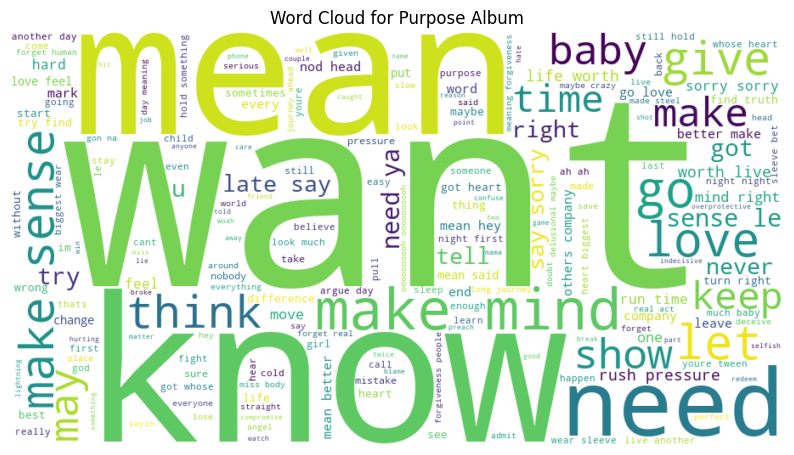

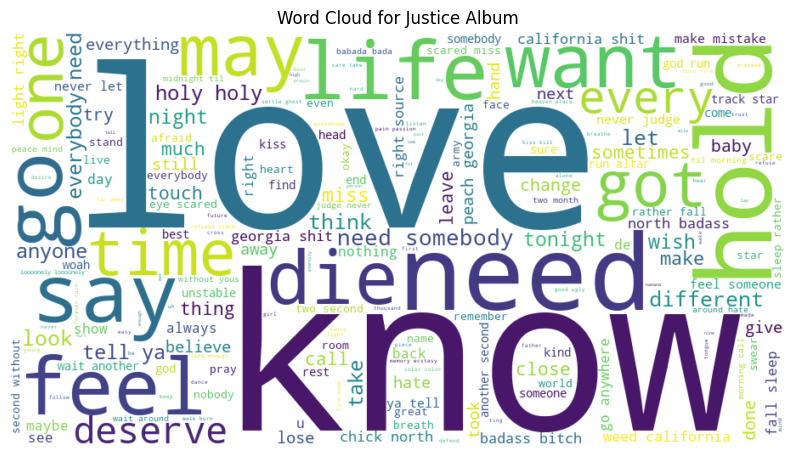

In [12]:
# Load the image file
justin_shape = np.array(Image.open('Justin_Bieber_logo.png'))

justice_shape = np.array(Image.open('Justin_Bieber_logo.png'))

# Generate word cloud for 'Purpose' album
purpose_lyrics = ' '.join(data[data['album'] == 'Purpose']['cleaned_lyrics'])
wordcloud_purpose = WordCloud(width=800, height=800, background_color='white', mask=justin_shape, contour_width=3, contour_color='black').generate(purpose_lyrics)

# Generate word cloud for 'Justice' album
justice_lyrics = ' '.join(data[data['album'] == 'Justice']['cleaned_lyrics'])
wordcloud_justice = WordCloud(width=800, height=800, background_color='white', mask=justice_shape, contour_width=3, contour_color='black').generate(justice_lyrics)

# Plot word cloud for 'Purpose' album
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_purpose, interpolation='bilinear')
plt.title('Word Cloud for Purpose Album')
plt.axis('off')
plt.show()

# Plot word cloud for 'Justice' album
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_justice, interpolation='bilinear')
plt.title('Word Cloud for Justice Album')
plt.axis('off')
plt.show()

--

3.1.1. Words Indicative of Themes in “Purpose”

1.	“Want,” “Need,” “Make,” “Mind,” “Think,” “Know”:
    - These words suggest introspection, decision-making, and a desire to understand oneself, which align with themes of self-discovery and personal challenges.
    - Examples:
        - “Want” and “Need” imply a search for fulfillment and purpose.
        - “Make” and “Mind” could refer to making decisions and finding clarity in one’s thoughts.

2.	“Sense,” “Believe,” “Try,” “Show”:
    - These words indicate an effort to understand, believe in oneself, and demonstrate one’s worth, which are common themes in overcoming personal challenges.
    - Examples:
        - “Believe” reflects inner faith and confidence, crucial in self-discovery.
        - “Try” and “Show” suggest persistence and the effort to reveal one’s true self.

--

3.1.2. Words Indicative of Themes in “Justice”

1.	“Love,” “Life,” “Feel,” “Die,” “Say”:
    - These words reflect deep emotional experiences and universal themes of love, life, and mortality, suggesting a focus on broader societal issues and human connections.
    - Examples:
        - “Love” and “Life” are central to human experience and societal well-being.
        - “Feel” and “Die” suggest exploration of deep emotions and existential themes.
2.	“Deserve,” “Need,” “Hold,” “One,” “Change”:
    - These words imply a sense of justice, fairness, and the need for change, which are often associated with societal issues and social justice themes.
    - Examples:
        - “Deserve” suggests a focus on what is fair and just.
        - “Change” indicates a desire to alter or improve societal conditions.

--

3.1.3. Summary

- “Purpose” Album:
    - The prominent words indicate a journey of self-discovery and overcoming personal challenges, as the lyrics often revolve around inner desires, thoughts, and beliefs.
- “Justice” Album:
    - The key words reflect themes of love, life, and societal issues, with a broader focus on human connections, justice, and emotional depth.

--

### 3.2. Thematic Analysis

3.2.1. Words Frequency

In [18]:
# Function to calculate word frequencies for a specific album
def calculate_word_frequencies(album_name):
    # Filter the lyrics by album
    album_lyrics = ' '.join(data[data['album'] == album_name]['cleaned_lyrics']).split()
    
    # Filter out stopwords
    filtered_words = [word for word in album_lyrics if word not in stopwords.words('english')]
    
    # Count word frequencies
    word_freq = Counter(filtered_words)
    
    # Convert to DataFrame
    common_words_df = pd.DataFrame(word_freq.most_common(10), columns=['Word', 'Frequency'])
    return common_words_df

# Calculate word frequencies for 'Purpose' album
purpose_word_freq = calculate_word_frequencies('Purpose')

# Calculate word frequencies for 'Justice' album
justice_word_freq = calculate_word_frequencies('Justice')

# Display the DataFrames
print("Word Frequencies for 'Purpose' Album:")
print(purpose_word_freq)

print("\nWord Frequencies for 'Justice' Album:")
print(justice_word_freq)

Word Frequencies for 'Purpose' Album:
    Word  Frequency
0   make         72
1   mean         59
2   want         58
3   like         51
4   need         45
5   know         43
6   love         36
7     go         31
8   mind         31
9  right         27

Word Frequencies for 'Justice' Album:
   Word  Frequency
0  need         77
1  love         64
2  know         61
3  like         49
4  hold         49
5    go         34
6  feel         32
7   say         28
8  life         27
9   get         27


--

3.2.2. Frequency Visualization

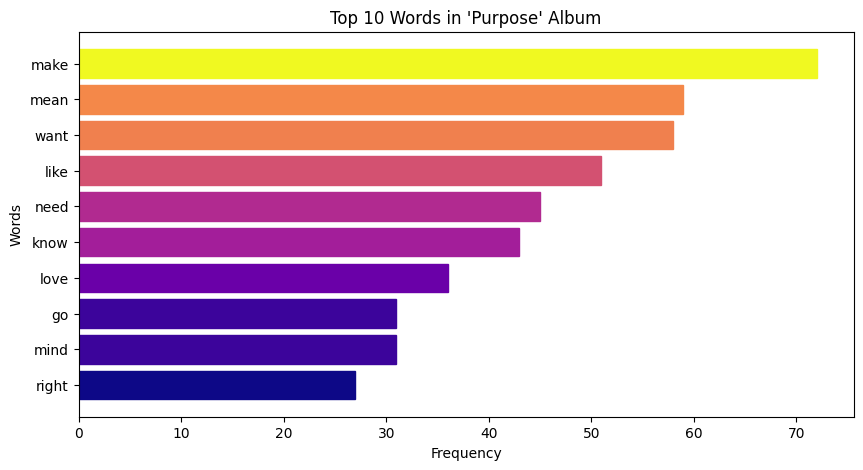

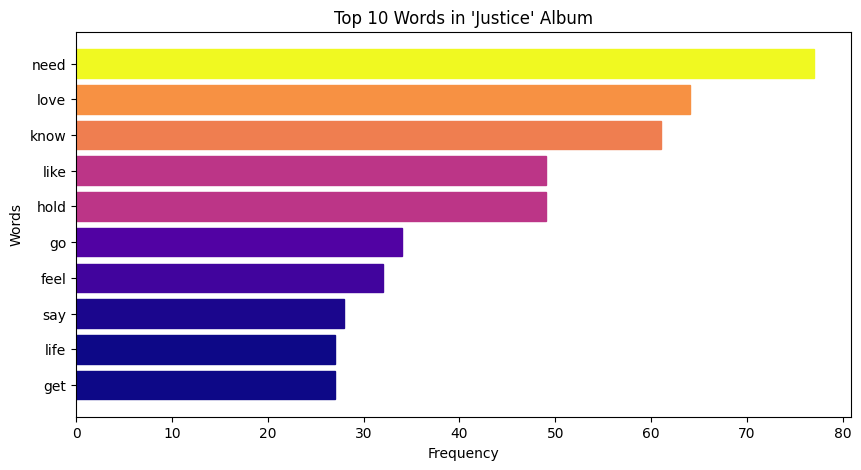

In [21]:
# Function to apply gradient to each bar
def apply_gradient_to_bars(ax, bars, cmap_name='viridis'):
    cmap = plt.get_cmap(cmap_name)
    norm = plt.Normalize(min(bars.datavalues), max(bars.datavalues))
    
    for bar in bars:
        bar_color = cmap(norm(bar.get_width()))
        bar.set_facecolor(bar_color)
        bar.set_edgecolor(bar_color)

# Plot for 'Purpose' Album with gradient color
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(purpose_word_freq['Word'], purpose_word_freq['Frequency'])
apply_gradient_to_bars(ax, bars, cmap_name='plasma')
ax.set_xlabel('Frequency')
ax.set_ylabel('Words')
ax.set_title("Top 10 Words in 'Purpose' Album")
ax.invert_yaxis()
plt.show()

# Plot for 'Justice' Album with gradient color
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(justice_word_freq['Word'], justice_word_freq['Frequency'])
apply_gradient_to_bars(ax, bars, cmap_name='plasma')
ax.set_xlabel('Frequency')
ax.set_ylabel('Words')
ax.set_title("Top 10 Words in 'Justice' Album")
ax.invert_yaxis()
plt.show()

--

3.2.3. Frequency Analysis

### “Purpose” Album: Themes of Self-Discovery and Personal Growth

| **Word** | **Occurance** | **Interpretation**                                        |**Example**                                        |
|:----:|:---------------:|:-------------------------------------------------------------:|:-------------------------:|
| Make   | 72         | The word “make” often implies action, creation, and decision-making. In the context of the “Purpose” album, it suggests Justin Bieber’s efforts to take control of his life and craft his own path. This is emblematic of the album’s overarching theme of self-discovery—Bieber is focused on making choices that define his identity and purpose.                     | Lyrics that include “make” might relate to making amends, making changes, or making important life decisions, all of which are central to the journey of finding oneself.                         |
| Mean   | 59        | The frequent use of “mean” may relate to understanding the significance or implications of actions and words. In the “Purpose” album, this can be linked to introspection and the search for meaning in life and relationships. Bieber might be questioning what things truly mean to him, which ties into his journey of understanding his purpose.                     | Instances of “mean” could be found in lyrics where Bieber is contemplating the impact of his actions or the true intentions behind his words, reflecting a deeper level of self-awareness.                       |
| Want   | 58        | The word “want” reflects desires and aspirations. In “Purpose,” this could indicate Bieber’s expression of what he seeks in life—whether it’s love, redemption, or clarity. This aligns with the theme of self-discovery, as understanding one’s desires is a crucial part of defining one’s purpose.                    | “Want” might appear in lyrics where Bieber expresses his longing for something greater, be it emotional fulfillment or a better understanding of himself.                       |
| Need   |  45 | “Need” often signifies essential desires or requirements. In “Purpose,” this could be about recognizing what is truly necessary for Bieber’s personal growth and happiness. This word ties into the theme of acknowledging what is critical in life, be it love, forgiveness, or self-acceptance.                   | Lyrics involving “need” might explore Bieber’s realization of what he cannot live without, whether it’s love, peace, or purpose.                       |
| Know   |  43 | The word “know” suggests a quest for understanding and certainty. In the “Purpose” album, it likely reflects Bieber’s journey to gain knowledge about himself and his place in the world. This ties directly into the theme of self-discovery, as knowing oneself is key to finding purpose.                  | “Know” might be found in lyrics where Bieber is seeking or expressing newfound understanding, whether about life, relationships, or his personal mission.                       |

- Conclusion:
    - The frequent words in “Purpose” highlight Justin Bieber’s introspective journey, focusing on personal growth, understanding, and the search for meaning and purpose in life.

### “Justice” Album: Themes of Societal Issues and Emotional Connections

| **Word** | **Occurance** | **Interpretation**                                        |**Example**                                        |
|:----:|:---------------:|:-------------------------------------------------------------:|:-------------------------:|
| Need   | 77         | While “need” appeared in the “Purpose” album, its prominence in “Justice” may reflect a broader scope—possibly the needs of society or the necessity of justice and equity. This aligns with the album’s broader themes of societal issues, suggesting a call to recognize and address the needs of others.                    | “Need” in “Justice” could be found in lyrics that address what society requires to achieve justice and equality, or what individuals need from each other in times of struggle.                        |
| Love   | 64        | “Love” is central to the “Justice” album, reflecting its focus on emotional connections and societal healing. The frequent use of “love” suggests that Bieber is not only exploring personal love but also extending it to a broader societal context, advocating for love as a solution to injustice.                    | Lyrics involving “love” might delve into romantic relationships, but also into the idea of universal love and compassion as forces for good in the world.                      |
| Feel   | 32        | The word “feel” underscores the emotional depth of the “Justice” album. It suggests a focus on empathy, understanding, and connection, both on a personal level and within society. This ties into the album’s broader themes of emotional and social justice, encouraging listeners to be in touch with their feelings and the feelings of others.                   | “Feel” might be prominent in lyrics that discuss the importance of emotional awareness, both in personal relationships and in understanding the struggles of others in society.                      |
| Say   |  28  | “Say” might reflect a theme of expression and communication. In “Justice,” this could be about speaking out against injustice, advocating for change, or simply expressing one’s truth. It ties into the album’s call for action and vocalizing one’s beliefs to make a difference.                 | Lyrics with “say” may emphasize the importance of using one’s voice to advocate for justice, express love, or connect with others.                     |
|Life  |  27 | The word “life” in “Justice” likely represents a focus on the value of human life and the need to protect and cherish it. This ties into themes of justice, as many of the album’s songs deal with issues like inequality, prejudice, and the importance of standing up for what is right.                | “Life” could appear in lyrics that highlight the sanctity of life, the challenges people face, or the importance of living a just and meaningful existence.                      |


--

3.2.4. Conclusion
- The word frequencies in “Justice” emphasize broader themes of love, justice, and emotional connection, reflecting Bieber’s shift towards addressing societal issues and advocating for change through empathy and understanding.

--

### 3.3. Keyword Analysis

3.3.1. TF-IDF Calculation

In [31]:
# Combine the lyrics for each album into a single document
purpose_lyrics = ' '.join(data[data['album'] == 'Purpose']['cleaned_lyrics'])
justice_lyrics = ' '.join(data[data['album'] == 'Justice']['cleaned_lyrics'])

# Create a corpus with the two documents (one for each album)
corpus = [purpose_lyrics, justice_lyrics]

In [32]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=20)  # max_features limits to top 20 terms

# Fit the vectorizer to the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Convert the TF-IDF matrix to a DataFrame for easier analysis
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=tfidf_vectorizer.get_feature_names_out(), columns=['Purpose', 'Justice'])

# Display the top keywords with their TF-IDF scores
tfidf_df = tfidf_df.sort_values(by=['Purpose', 'Justice'], ascending=False)
tfidf_df

,Purpose,Justice
mean,0.490810,0.000000
make,0.426161,0.102678
want,0.343297,0.147600
like,0.301864,0.314452
need,0.266351,0.494138
know,0.254513,0.391460
love,0.213081,0.410712
mind,0.183486,0.044922
right,0.159811,0.128348
say,0.147973,0.179687


--

3.3.2. TF-IDF Visualization

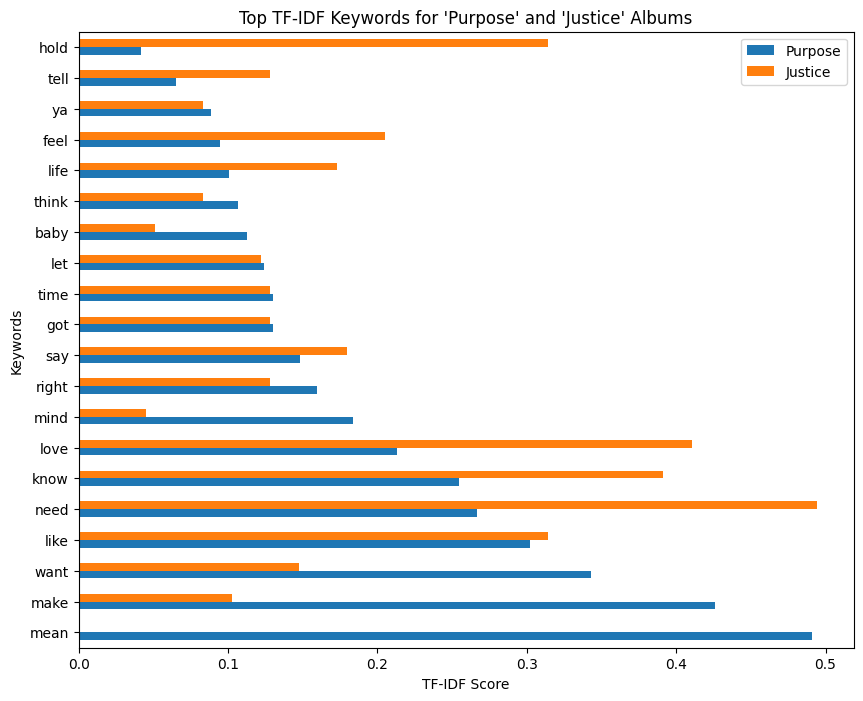

In [33]:
# Visualize the top TF-IDF keywords for each album
tfidf_df.plot(kind='barh', figsize=(10, 8), title="Top TF-IDF Keywords for 'Purpose' and 'Justice' Albums")
plt.xlabel("TF-IDF Score")
plt.ylabel("Keywords")
plt.show()

--

3.3.3. TF-IDF Analysis

- Key Insights:

| **Album** | **Insight** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------:|
| Purpose   | Top Keywords         | Words like “mean,” “make,” “want,” and “like” have higher TF-IDF scores in the “Purpose” album.                    |
|    | Themes       | The prominence of these words suggests that the “Purpose” album focuses heavily on introspection and self-reflection.                           |
|    |      | Words like “mean” and “make” may be indicative of Justin Bieber’s journey in understanding his identity, intentions, and purpose, which align with the album’s overall theme of self-discovery and personal challenges.                          |
| Justice   | Top Keywords         | Words such as “need,” “love,” “hold,” and “feel” are more prominent in the “Justice” album, with higher TF-IDF scores.                    |
|    | Themes       | The focus on these keywords points to the album’s broader themes of love, societal issues, and emotional connections.                            |
|    |      | “Justice” seems to be more outward-looking, addressing themes that go beyond personal reflection, including societal responsibilities and deeper emotional connections.                         |


--


3.3.4. Comparison

- Contrast in Themes:
    - The “Purpose” album is more introspective, with keywords reflecting a journey of personal growth and understanding (e.g., “mean,” “make”).
    - The “Justice” album, on the other hand, appears to be more focused on relationships, societal issues, and love (e.g., “love,” “need,” “hold”).
- Overlap:
    - Some words like “like,” “know,” “want,” and “say” appear in both albums but have different levels of importance, suggesting that while there are common themes, their emphasis and context differ between the two albums.

--

### 3.4. Sentiment Analysis

3.4.1. Sentiment Calculation and Categorization

In [25]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to compute sentiment scores
def compute_detailed_sentiment(text):
    return analyzer.polarity_scores(text)

# Apply sentiment analysis to each song's lyrics
data['sent_scores'] = data['cleaned_lyrics'].apply(compute_detailed_sentiment)

# Extract compound score and overall sentiment
data['comp_score'] = data['sent_scores'].apply(lambda x: x['compound'])
data['sentiment'] = data['comp_score'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

# Display the resulting DataFrame with Song Title, Album, Compound Score, and Sentiment
result_df = data[['title', 'album', 'comp_score', 'sentiment']]
result_df  # Display

,title,album,comp_score,sentiment
0,Mark My Words,Purpose,0.6012,Positive
1,I’ll Show You,Purpose,0.9854,Positive
2,What Do You Mean?,Purpose,0.9555,Positive
3,Sorry,Purpose,-0.7237,Negative
4,Love Yourself,Purpose,0.9894,Positive
5,Company,Purpose,0.5894,Positive
6,No Pressure,Purpose,0.9856,Positive
7,No Sense,Purpose,0.8802,Positive
8,The Feeling,Purpose,0.9986,Positive
9,Life Is Worth Living,Purpose,0.9930,Positive


--

3.4.2. Sentiment Visualization

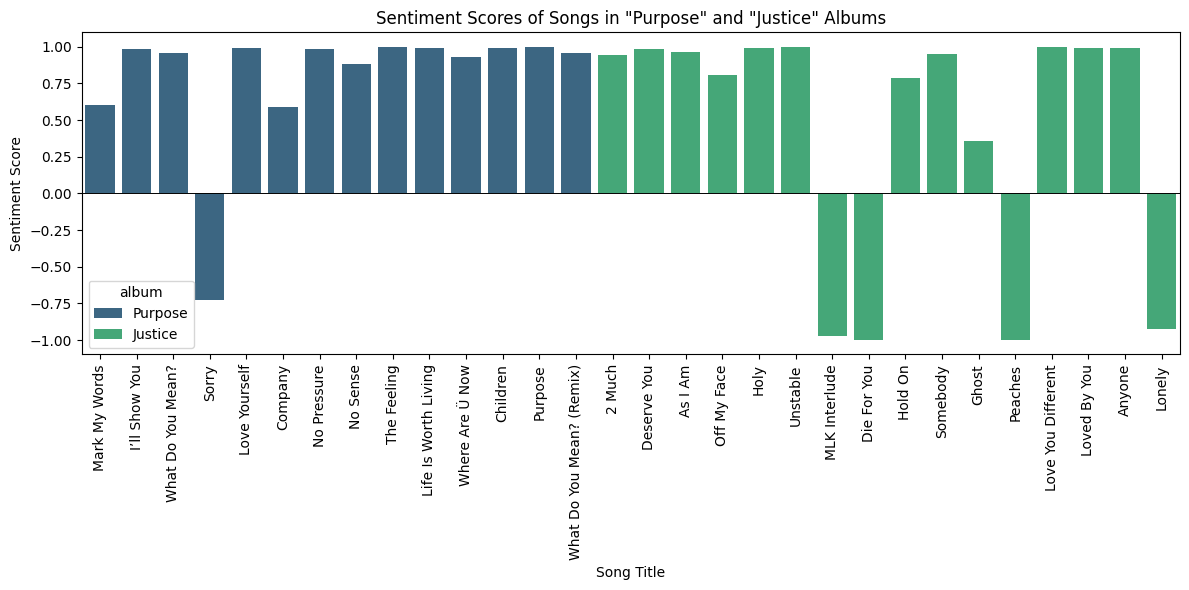

In [27]:
# Set up the figure and axes for the bar chart
plt.figure(figsize=(12, 6))

# Bar chart for sentiment scores
sns.barplot(x='title', y='comp_score', hue='album', data=data, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Song Title')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores of Songs in "Purpose" and "Justice" Albums')
plt.axhline(0, color='black', linewidth=0.7)  # Add a horizontal line at sentiment score 0
plt.tight_layout()
plt.show()

--

3.4.3. Key Observations

1.	“Purpose” Album:
    - The vast majority of the songs in “Purpose” are marked with positive sentiment, with very high compound scores close to 1.0. This aligns with the earlier interpretation that, despite dealing with personal challenges, the album reflects a generally optimistic and positive emotional tone.
    - Notably, the song “Sorry” has a negative sentiment score, which may indicate its theme of regret and seeking forgiveness, a more somber emotional tone in the context of the album.
2.	“Justice” Album:
    - The sentiment in “Justice” is generally positive but with more variability compared to “Purpose.” Songs like “MLK Interlude,” “Die For You,” and “Peaches” show strong negative sentiment scores, which could reflect the gravity of the societal issues and complex emotional themes addressed in the album.
    - The higher sentiment variability suggests a mix of hopeful and serious tones, matching the album’s focus on love and justice, which are inherently complex and multifaceted themes.


--

### 3.5. Length of Sentence of Each Album

3.5.1. Visualization

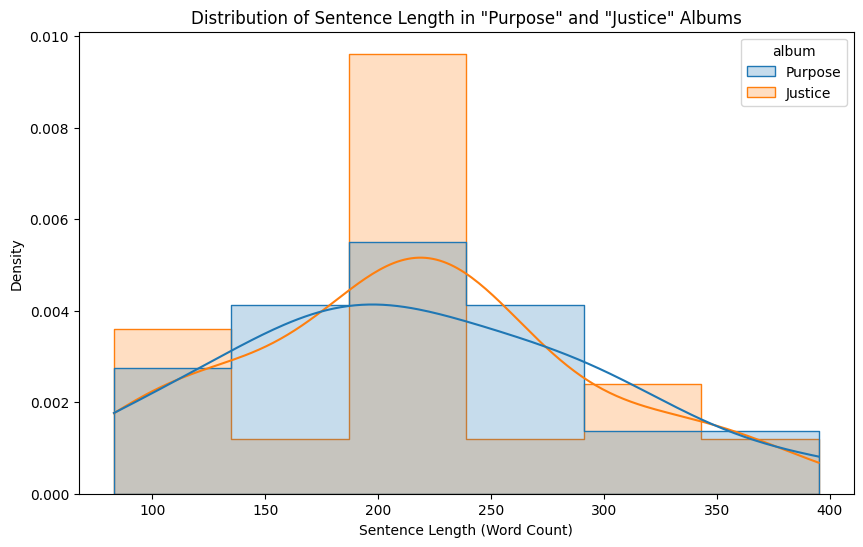

In [35]:
# Create a new DataFrame for the sentence length analysis
length_df = data[['album', 'cleaned_lyrics']].copy()
length_df['sentence_length'] = length_df['cleaned_lyrics'].apply(lambda x: len(x.split()))

# Plot the distribution with KDE (Kernel Density Estimate) overlay
plt.figure(figsize=(10, 6))
sns.histplot(data=length_df, x="sentence_length", hue="album", element="step", stat="density", common_norm=False, kde=True)

# Customize the plot
plt.title('Distribution of Sentence Length in "Purpose" and "Justice" Albums')
plt.xlabel('Sentence Length (Word Count)')
plt.ylabel('Density')
plt.show()

--

3.5.2. Key Insights

1.	Sentence Length Distribution:
    - The sentence length distribution in the “Justice” album shows a more pronounced peak around 200 words, suggesting that the lyrics in this album tend to have longer sentences compared to “Purpose.”
    - The “Purpose” album, on the other hand, has a flatter distribution, indicating more variation in sentence lengths, with no single length dominating as much as in “Justice.”
2.	Overall Complexity:
    - The broader spread of sentence lengths in “Purpose” may suggest more complexity in its lyrics, possibly reflecting the introspective and personal nature of the themes, where varying sentence lengths could convey nuanced emotions and thoughts.
    - The “Justice” album, with its sharper peak around 200 words, might reflect a more structured and consistent lyrical style, aligning with the album’s focus on broader societal themes and messages.
3.	Thematic Implications:
    - The “Purpose” album’s varied sentence lengths may be indicative of a journey of self-discovery and personal challenges, where the expression of thoughts and feelings is more varied and complex.
    - The “Justice” album’s more consistent sentence lengths might indicate a focus on clear messaging around love, societal issues, and emotional connections, with lyrics designed to resonate more uniformly with a wide audience.

--


3.5.3. Summary
- In summary, the distribution suggests that “Purpose” has a more varied and potentially complex lyrical structure, while “Justice” may focus on delivering its themes in a more consistent and possibly more accessible way. This aligns well with the thematic focus you’ve identified in your analysis, where “Purpose” centers on personal growth and challenges, and “Justice” addresses broader societal issues and love.

---

# 4. Conclusion

- Through a detailed exploration of Justin Bieber’s Purpose and Justice albums, we have uncovered the significant thematic and emotional differences that define these two phases of his musical journey.


### 4.1. Purpose: A Journey of Self-Discovery
- The Purpose album, released in 2015, is characterized by its introspective nature, where themes of redemption, self-discovery, and personal growth dominate. Our word frequency analysis highlighted words like “make,” “mean,” and “want,” which tie into the album’s focus on finding personal purpose and dealing with internal challenges. The sentiment analysis revealed a generally positive tone, aligning with Bieber’s attempt to reconcile his past and move forward. The top TF-IDF keywords for Purpose further underscored this inward focus, with words like “mean,” “make,” and “want” being most prominent.

--


### 4.2. Justice: A Broader Focus on Society and Love
- In contrast, Justice reflects a more mature and outward-looking perspective. Released in 2021, this album delves into broader societal issues while also highlighting personal relationships, particularly Bieber’s love for his wife. The word frequency analysis for Justice showed a shift towards words like “love,” “need,” and “life,” indicating a focus on emotional connections and societal values. The sentiment analysis showed a more varied emotional tone, with a mix of positive and negative sentiments that mirror the complex themes explored in the album. The TF-IDF analysis for Justice reinforced this broader thematic scope, with keywords like “love,” “need,” and “hold” standing out.

--


### 4.3. Key Differences and Artistic Growth
- The thematic evolution from Purpose to Justice is evident in both the language and the emotional tone of the albums. Purpose is introspective, dealing with personal struggles and the search for meaning, while Justice expands its focus to include love and societal issues, reflecting Bieber’s growth as an artist and as a person. The sentiment analysis, combined with keyword importance, paints a picture of an artist who has transitioned from grappling with his own challenges to addressing the broader world around him.

--


### 4.4. Final Thoughts
- Together, these analyses not only highlight the differences between the two albums but also underscore the narrative of Justin Bieber’s growth. From a young man dealing with personal demons to an artist who seeks to make a difference in the world, Bieber’s journey is mirrored in the evolution of his music. By examining the lyrics and themes of Purpose and Justice, we gain a deeper understanding of how far he has come and the messages he now wishes to convey through his art.

---

# 5. Recommendation

### 5.1. Text Classification with Larger Datasets
- Our attempt to classify songs from the Purpose and Justice albums using text classification was hindered by the small sample size. For text classification to be effective, it is crucial to have a sufficiently large dataset. With more data, we could explore more sophisticated models like Support Vector Machines (SVM), Neural Networks, or ensemble methods to achieve higher accuracy. In future analyses, consider collecting a larger corpus of lyrics, either by including more songs from each album or by expanding the dataset to include lyrics from multiple artists with similar themes. This will provide a richer dataset for training and testing classification models.

--


### 5.2. Application to Other Data Scenarios
- The methods and techniques applied in this analysis can be extended to various other data scenarios:
    - Customer Reviews Analysis: The sentiment analysis and thematic keyword extraction techniques used here can be applied to analyze customer reviews, helping businesses understand customer satisfaction, pain points, and areas for improvement.
    - Social Media Sentiment Tracking: By applying sentiment analysis and keyword extraction to social media data, companies can monitor public sentiment toward brands, products, or political events in real-time. This can provide valuable insights for marketing strategies and public relations management.
    - Topic Modeling in News Articles: Thematic analysis and TF-IDF could be particularly useful in identifying and tracking key topics in news articles over time, allowing for the analysis of media coverage on certain issues or events.
    - Literary Analysis: The tools we used can also be applied in the literary field to analyze themes, sentiments, and linguistic patterns in novels, poems, or other literary works, providing a deeper understanding of an author’s style and thematic focus.

--


### 5.3. Final Note
- While our analysis provided valuable insights into the differences between Purpose and Justice, the limited dataset restricted the scope of our text classification efforts. Future analyses should focus on gathering more data to ensure the reliability and generalizability of the results. With a larger dataset and the application of more advanced NLP techniques, it would be possible to derive deeper insights and build more robust models for understanding and categorizing lyrical content.

---